In [43]:
#Load the required libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import geoplot
%matplotlib inline

In [44]:
ciiu = pd.read_csv('CIIU.csv',sep=';')
ciiu.head()

,AGRUPACION_TARIFA,CIIU_3,CIIU_4,DESCRIPCION,TARIFA
0,101.0,1511,1011,Procesamiento y conservación de carne y produc...,4.14
1,101.0,1512,1012,"Procesamiento y conservación de pescados, crus...",4.14
2,101.0,1522,1030,Elaboración de aceites y grasas de origen vege...,4.14
3,101.0,1541,1051,Elaboración de productos de molinería,4.14
4,101.0,1542,1052,Elaboración de almidones y productos derivados...,4.14


In [45]:
establishments = pd.read_csv('Empresas.csv',sep=';')
print(len(establishments))
establishments.head(3)

C:\Users\Giuseppe\Anaconda3\envs\DS4A_test\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


451758


,NIT,DIGITO_VERIFICACION,RAZON_SOCIAL,NOMBRE_COMERCIAL,DIRECCION,MUNICIPIO,DEPARTAMENTO,CIIU_3,CIIU_4,Direccion Estandarizada,...,Nivel Socio Economico,Nivel Socio Economico Frente,Manzana Frente,Manzana Frente.1,Barrio,Barrio Frente,Localidad,Localidad Frente,Longitud,Latitud
0,900980890,7,SUBLIME ART Y DESIGN S.A.S.,NaN,CL 18 SUR 12 D 29,BOGOTA,CUNDINAMARCA,7430,7310,CL 18 SUR # 12 D - 29,...,3.0,NaN,1.20402e+06,NaN,Ciudad Jardin Sur,NaN,Antonio NariÃ±o,NaN,-74.098380,4.581728
1,901055614,7,REDES COMERCIALES SAS,NaN,KR 67 A 10 A 26,BOGOTA,CUNDINAMARCA,5127,4632,KR 67 A # 10 A - 26,...,3.0,NaN,6.21203e+06,NaN,Salazar Gomez,NaN,Puente Aranda,NaN,-74.119882,4.633324
2,900705887,7,GONZALEZ SAENZ CONSTRUCCIONES Y CIA S.A.S.,NaN,KR 90 6A 47 CA 142,BOGOTA,CUNDINAMARCA,0,4330,KR 90 # 6 A - 47 CS 142,...,2.0,NaN,6.51602e+06,NaN,Campo Alegre,NaN,Kennedy,NaN,-74.159299,4.648638


In [46]:
merged = pd.merge(establishments,ciiu[['CIIU_4','DESCRIPCION']], on='CIIU_4', how ='right')
merged.dropna(subset=['NIT','DESCRIPCION','Longitud'],inplace=True)
merged = merged.drop_duplicates(subset=['NIT','RAZON_SOCIAL','Longitud','Latitud','DESCRIPCION'], keep="first")
print(len(merged))
merged.tail(3)
merged.to_csv('EmpresasDescripcion.csv')

313782


In [39]:
merged['geometry'] = merged.apply(lambda row: 
                                        shp.geometry.Point(row['Longitud'],row['Latitud']),axis=1)
merged.crs = {'init' :'epsg:4326'}
merged.drop(['Longitud','Latitud'],axis=1,inplace=True)
print(len(merged))
merged.head(3)

C:\Users\Giuseppe\Anaconda3\envs\DS4A_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


313782


,NIT,DIGITO_VERIFICACION,RAZON_SOCIAL,NOMBRE_COMERCIAL,DIRECCION,MUNICIPIO,DEPARTAMENTO,CIIU_3,CIIU_4,Direccion Estandarizada,...,Nivel Socio Economico,Nivel Socio Economico Frente,Manzana Frente,Manzana Frente.1,Barrio,Barrio Frente,Localidad,Localidad Frente,DESCRIPCION,geometry
0,900980890.0,7.0,SUBLIME ART Y DESIGN S.A.S.,NaN,CL 18 SUR 12 D 29,BOGOTA,CUNDINAMARCA,7430.0,7310,CL 18 SUR # 12 D - 29,...,3.0,NaN,1.20402e+06,NaN,Ciudad Jardin Sur,NaN,Antonio NariÃ±o,NaN,Publicidad,POINT (-74.09837978 4.58172834)
1,800069089.0,4.0,SONIDO COMERCIAL PUBLICITARIO S.A.S.,SONIDO COMERCIAL PUBLICITRIO LTDA,CL 98 8 33,BOGOTA,CUNDINAMARCA,7430.0,7310,CL 98 # 8 - 33,...,6.0,NaN,8.301e+06,NaN,Chico Norte II,NaN,Chapinero,NaN,Publicidad,POINT (-74.04056246 4.67935249)
2,900722627.0,0.0,PARK INC SOLUTIONS S.A.S.,NaN,KR 48 101A 79,BOGOTA,CUNDINAMARCA,7430.0,7310,KR 48 # 101 A - 79,...,5.0,NaN,9.12605e+06,NaN,Estoril,NaN,Suba,NaN,Publicidad,POINT (-74.06023161 4.68919273)


In [54]:
sectores = list(merged['DESCRIPCION'].value_counts().index)[:4]+['otros']

In [62]:
colores  = ['red','blue','yellow','green','black']
dic_sectores = {sectores[i]:colores[i] for i in range(0,5)}

In [63]:
dic_sectores

{'Actividades de otras asociaciones n.c.p.': 'red',
 'Actividades inmobiliarias realizadas con bienes propios o arrendados': 'blue',
 'Construcción de otras obras de ingeniería civil': 'yellow',
 'Construcción de edificios residenciales': 'green',
 'otros': 'black'}

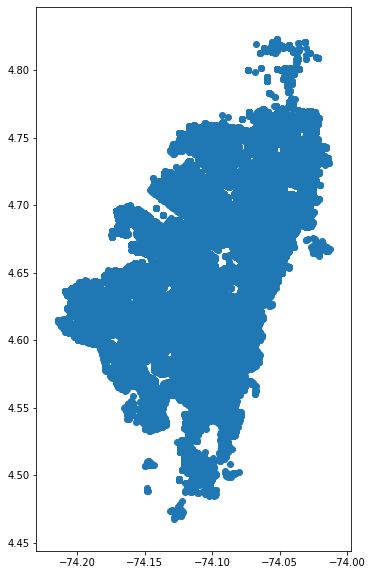

In [42]:
merged= gpd.GeoDataFrame(merged, geometry=merged['geometry'])
merged.plot(figsize=(10,10))
merged.to_file('Empresas.shp')

In [68]:
import folium
merged["DESCRIPCION_SIMPLE"] = merged["DESCRIPCION"].map(lambda x: x if x in dic_sectores else 'otros')

folium_map = folium.Map(location=[4.65, -74.10],
                        zoom_start=13,
                        tiles="OpenStreetMap")

for i in range(0,len(merged)):
    marker = folium.CircleMarker(location=[merged["Latitud"].iloc[i],merged["Longitud"].iloc[i]],
                                 radius=5,color=dic_sectores[merged['DESCRIPCION_SIMPLE'].iloc[i]],fill=True)
    marker.add_to(folium_map)

folium_map.save('mapa1.html')